<a href="https://colab.research.google.com/github/srishtidesai026/Ai-Voice-Assis/blob/main/RNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Cleansing Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/Timestamp,Accel_X,Accel_Y,Accel_Z,G.txt")
dummy = pd.get_dummies(data=df, columns=['Timestamp'],drop_first=True)
dummy

,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Timestamp_2024-08-01 12:00:01,...,Timestamp_2024-08-01 12:00:20,Timestamp_2024-08-01 12:00:21,Timestamp_2024-08-01 12:00:22,Timestamp_2024-08-01 12:00:23,Timestamp_2024-08-01 12:00:24,Timestamp_2024-08-01 12:00:25,Timestamp_2024-08-01 12:00:26,Timestamp_2024-08-01 12:00:27,Timestamp_2024-08-01 12:00:28,Timestamp_2024-08-01 12:00:29
0,0.12,-0.03,0.98,0.01,0.02,-0.01,30,-50,40,False,...,False,False,False,False,False,False,False,False,False,False
1,0.15,-0.02,0.97,0.02,0.01,-0.02,32,-52,42,True,...,False,False,False,False,False,False,False,False,False,False
2,0.11,-0.01,0.99,0.01,0.00,-0.01,31,-51,41,False,...,False,False,False,False,False,False,False,False,False,False
3,0.13,-0.04,0.96,0.00,0.03,-0.03,29,-49,39,False,...,False,False,False,False,False,False,False,False,False,False
4,0.14,-0.03,0.98,0.01,0.02,-0.02,30,-50,40,False,...,False,False,False,False,False,False,False,False,False,False
5,0.16,-0.02,0.95,0.03,0.01,-0.03,33,-53,43,False,...,False,False,False,False,False,False,False,False,False,False
6,0.10,-0.01,0.98,0.02,0.00,-0.02,30,-50,41,False,...,False,False,False,False,False,False,False,False,False,False
7,0.12,-0.03,0.99,0.01,0.02,-0.01,31,-51,40,False,...,False,False,False,False,False,False,False,False,False,False
8,0.13,-0.02,0.97,0.00,0.03,-0.02,32,-52,42,False,...,False,False,False,False,False,False,False,False,False,False
9,0.15,-0.01,0.96,0.02,0.01,-0.03,34,-54,44,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('Accel_X', axis=1), dummy['Accel_Y'], test_size = 0.2, random_state=42)
X_train

,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Timestamp_2024-08-01 12:00:01,Timestamp_2024-08-01 12:00:02,...,Timestamp_2024-08-01 12:00:20,Timestamp_2024-08-01 12:00:21,Timestamp_2024-08-01 12:00:22,Timestamp_2024-08-01 12:00:23,Timestamp_2024-08-01 12:00:24,Timestamp_2024-08-01 12:00:25,Timestamp_2024-08-01 12:00:26,Timestamp_2024-08-01 12:00:27,Timestamp_2024-08-01 12:00:28,Timestamp_2024-08-01 12:00:29
28,-0.01,0.98,0.00,0.00,-0.01,30,-50,40,False,False,...,False,False,False,False,False,False,False,False,True,False
24,-0.01,0.99,0.02,0.03,-0.03,30,-50,40,False,False,...,False,False,False,False,True,False,False,False,False,False
12,-0.01,0.96,0.01,0.01,-0.03,31,-51,42,False,False,...,False,False,False,False,False,False,False,False,False,False
0,-0.03,0.98,0.01,0.02,-0.01,30,-50,40,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.03,0.98,0.01,0.02,-0.02,30,-50,40,False,False,...,False,False,False,False,False,False,False,False,False,False
16,-0.04,0.98,0.03,0.02,-0.01,33,-53,42,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.02,0.95,0.03,0.01,-0.03,33,-53,43,False,False,...,False,False,False,False,False,False,False,False,False,False
13,-0.02,0.95,0.00,0.02,-0.01,30,-50,40,False,False,...,False,False,False,False,False,False,False,False,False,False
11,-0.03,0.98,0.03,0.02,-0.02,33,-53,41,False,False,...,False,False,False,False,False,False,False,False,False,False
22,-0.01,0.98,0.01,0.01,-0.01,32,-52,42,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('Accel_X', axis=1), dummy['Accel_Y'], test_size = 0.2, random_state=42)
X_test

,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z,Mag_X,Mag_Y,Mag_Z,Timestamp_2024-08-01 12:00:01,Timestamp_2024-08-01 12:00:02,...,Timestamp_2024-08-01 12:00:20,Timestamp_2024-08-01 12:00:21,Timestamp_2024-08-01 12:00:22,Timestamp_2024-08-01 12:00:23,Timestamp_2024-08-01 12:00:24,Timestamp_2024-08-01 12:00:25,Timestamp_2024-08-01 12:00:26,Timestamp_2024-08-01 12:00:27,Timestamp_2024-08-01 12:00:28,Timestamp_2024-08-01 12:00:29
27,-0.02,0.97,0.01,0.01,-0.03,31,-51,41,False,False,...,False,False,False,False,False,False,False,True,False,False
15,-0.01,0.99,0.01,0.00,-0.03,31,-51,41,False,False,...,False,False,False,False,False,False,False,False,False,False
23,-0.02,0.97,0.00,0.02,-0.02,31,-51,41,False,False,...,False,False,False,True,False,False,False,False,False,False
17,-0.02,0.96,0.02,0.01,-0.02,30,-50,40,False,False,...,False,False,False,False,False,False,False,False,False,False
8,-0.02,0.97,0.00,0.03,-0.02,32,-52,42,False,False,...,False,False,False,False,False,False,False,False,False,False
9,-0.01,0.96,0.02,0.01,-0.03,34,-54,44,False,False,...,False,False,False,False,False,False,False,False,False,False


## Preparing Dataset for Neural Network (Training data)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('Accel_X', axis=1), dummy['Accel_Y'], test_size = 0.2, random_state=42)

# choose colums from training data
training_set = X_train.iloc[:,1:2].values

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)
training_set_scaled

array([[1.        , 0.75      , 0.        , 0.        , 1.        ,
        0.2       , 0.8       , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 1.        , 0.66666667, 1.        , 0.        ,
        0.2       , 0.8       , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.     

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('Accel_X', axis=1), dummy['Accel_Y'], test_size = 0.2, random_state=42)

# choose colums from training data
training_set = X_train.iloc[:,1:2].values

# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X_train)

# create timesteps of 12 and 1 output
X_train=[]
y_train=[]
for i in range(12, training_set_scaled.shape[0]):
  X_train.append(training_set_scaled[i-12:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

# reshaping scaled dataset
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_train

array([[[1.        ],
        [1.        ],
        [1.        ],
        [0.33333333],
        [0.33333333],
        [0.        ],
        [0.66666667],
        [0.66666667],
        [0.33333333],
        [1.        ],
        [0.66666667],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [0.33333333],
        [0.33333333],
        [0.        ],
        [0.66666667],
        [0.66666667],
        [0.33333333],
        [1.        ],
        [0.66666667],
        [1.        ],
        [0.        ]],

       [[1.        ],
        [0.33333333],
        [0.33333333],
        [0.        ],
        [0.66666667],
        [0.66666667],
        [0.33333333],
        [1.        ],
        [0.66666667],
        [1.        ],
        [0.        ],
        [0.        ]],

       [[0.33333333],
        [0.33333333],
        [0.        ],
        [0.66666667],
        [0.66666667],
        [0.33333333],
        [1.        ],
        [0.66666667],
        [1.        ],
    

## Initialising and training RNN

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# initialise RNN
regressor = Sequential()

# adding layers to the model

# Layer 1
regressor.add(LSTM(units=10,return_sequences=True, input_shape=(X_train.shape[1],1)))
# dropping 20% of layers to avoid overtraining of data
regressor.add(Dropout(0.2))

# Layer 2
regressor.add(LSTM(units=10,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 3
regressor.add(LSTM(units=10,return_sequences=True))
regressor.add(Dropout(0.2))

# Layer 4
regressor.add(LSTM(units=10))
regressor.add(Dropout(0.2))

# output layer
regressor.add(Dense(units=1))

# compile model
regressor.compile(optimizer='adam',loss='mean_squared_error')

# train/fit model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2204
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2198
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2110
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2080
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1998
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1873
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1909
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1923
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1775
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1707
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1718
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1702
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1483
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1542
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1434
Epoch 16/100
1/1 ━━━━

## Using unscaled data (Test data) for testing Model

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy.drop('Accel_X', axis=1), dummy['Accel_Y'], test_size = 0.2, random_state=42)

# choose colums from test data
real_values = X_test.iloc[:,1:2].values

# getting predicted values using test dataset
dataset_total = pd.concat((X_train['Accel_Y'], X_test['Accel_Y']), axis=0)
inputs = dataset_total[len(dataset_total) - len(X_test) - 12:].values
inputs = inputs.reshape(-1,1)

sc_y = MinMaxScaler(feature_range=(0,1))
sc_y.fit(y_train.values.reshape(-1,1))
inputs = sc_y.transform(inputs)

X_test=[]

for i in range(12, inputs.shape[0]):
  X_test.append(inputs[i-12:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_values = regressor.predict(X_test)
predicted_values = sc_y.inverse_transform(predicted_values)
predicted_values



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[-0.03074792],
       [-0.03069119],
       [-0.03062673],
       [-0.03059773],
       [-0.03055906],
       [-0.03058673]], dtype=float32)

## Plotting graph


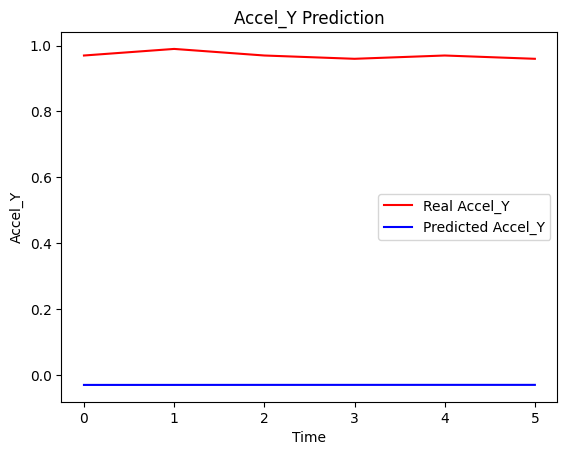

In [15]:
plt.plot(real_values, color='red', label='Real Accel_Y')
plt.plot(predicted_values, color = 'blue', label='Predicted Accel_Y')
plt.title('Accel_Y Prediction')
plt.xlabel('Time')
plt.ylabel('Accel_Y')
plt.legend()
plt.show()